In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.metrics import confusion_matrix
from tensorflow import keras

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential, clone_model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models


In [26]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices thru One-hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

print(x_train.dtype)
print(x_train.ndim)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
float32
4


In [28]:
from keras.backend import clear_session
clear_session()

In [20]:
# DEFINE the Model

input_shape = (32, 32, 3)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #layers.Conv2D(64, kernel_size=(3, 3), activation="relu",),
        #layers.Conv2D(64, kernel_size=(3, 3), activation="relu",),        
        
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),    
        layers.BatchNormalization(),                                      # BatchNorm after Conv layer """
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer        
        layers.BatchNormalization(),                                      # BatchNorm after Conv layer
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer
        layers.BatchNormalization(),                                      # BatchNorm after Conv layer """
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),                                      # BatchNorm after Conv layer
        layers.Dense(10, activation="softmax"),
    ]
)

In [21]:
# COMPILE the Model

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

In [22]:
# DATA AUGMENTATION TO INCREASE THE TRAINING DATA BY APPLYING RANDOM TRANSFORMATION (like rotation, zooming)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # Rotate images up to 15 degrees
    width_shift_range=0.1,   # Horizontally shift images by 10%
    height_shift_range=0.1,  # Vertically shift images by 10%
    horizontal_flip=True,    # Randomly flip images
)

# Fit the data generator on the training data
datagen.fit(x_train)



In [ ]:
# Using the data generator when training the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=100,
                    validation_data=(x_test, y_test))

#history = model.fit(x_train, y_train, batch_size=64, epochs=100)

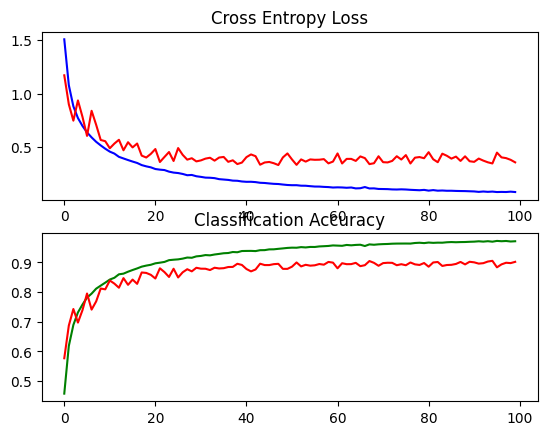

313/313 [==============================] - 1s 4ms/step - loss: 0.3579 - accuracy: 0.9022
Model Loss: 0.35794973373413086
Model Accuracy: 0.9021999835968018
313/313 [==============================] - 1s 3ms/step


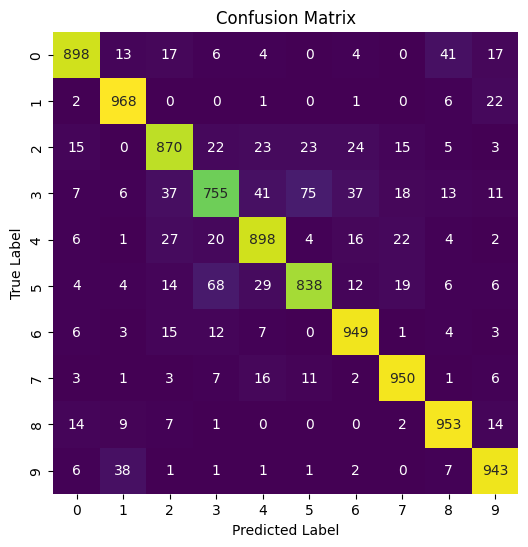

In [16]:

def evaluate_model(model, history):
    
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='val')

    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='green', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='val')
    plt.show()

    # evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Model Loss:', test_loss)
    print('Model Accuracy:', test_acc)

    # make predictions
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    conf_mat = confusion_matrix(y_test_labels, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    
evaluate_model(model,history)

In [17]:
# Evaluate the model with test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3579 - accuracy: 0.9022


In [ ]:
# DISPLAY IMAGES TO SEE WHAT THE MODEL IS SEEING/PREDICTING

import numpy as np
import matplotlib.pyplot as plt

# y_test is the true labels and y_pred is the predicted labels
# Also assuing x_test contains the original images

# Get the index of images to display
num_images = 10  # Number of images to display
indices = np.random.choice(np.arange(len(y_test)), size=num_images, replace=False)

# Prepare the figure
plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices):
    plt.subplot(2, num_images // 2, i + 1)  # Create a subplot grid
    plt.imshow(x_test[idx])  # Display the image
    plt.axis('off')  # Turn off axis
    
    # Display true and predicted labels
    true_label = np.argmax(y_test[idx])  # Get the true label
    predicted_label = np.argmax(y_pred[idx])  # Get the predicted label
    plt.title(f'True: {true_label}\nPred: {predicted_label}', fontsize=10)

plt.tight_layout()
plt.show()


# USING VGG16 to Evaluate the Accuracy 
 Step1: Exclude the final classification layer and keep the other layers
 Step2: Freeze all the VGG16 Layers
 Step3: Create new layer/model on top of VGG16 model
 Step4: Compile the model
 Step5: Train the model using CIFAR10 DS from above
 Step6: Evaluate the Model

In [29]:
# USING VGG16 to Evaluate the Accuracy 

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load VGG16 model pre-trained on ImageNet
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model on top of VGG16
model_vgg = models.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model_vgg.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=1e-4), #Adjust learning rate
                  metrics=['accuracy'])

model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1

In [31]:
import tensorflow as tf

# Define a function to resize images on the fly that includes Data augmentation function
def preprocess_image(image, label, augment=False):
    # Resize to 224x224
    image = tf.image.resize(image, (224, 224))  

    # Include Data augmentation steps below. After resizing and before picking the next batch
    if augment:
        # Apply random flipping
        image = tf.image.random_flip_left_right(image)
        # Apply random contrast adjustment
        image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
        # Apply random rotation (e.g., 20 degrees)
        image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
                               
    return image, label


# Convert the training dataset to TensorFlow Dataset API and apply augmentation + preprocessing
# Resizing done in batches of 32 instead of whole DS, leading to memory crash, Prefetch loads the next set while the current batch is in progress.
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(lambda x, y: preprocess_image(x, y, augment=True)).batch(256).prefetch(tf.data.AUTOTUNE)

# Convert the test dataset and apply only preprocessing (no augmentation)
# Resizing done in batches of 32 instead of whole DS, leading to memory crash, Prefetch loads the next set while the current batch is in progress.
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(lambda x, y: preprocess_image(x, y, augment=False)).batch(256).prefetch(tf.data.AUTOTUNE)

# Model training
history = model_vgg.fit(train_ds, epochs=10, validation_data=test_ds)


Epoch 1/10
391/391 [==============================] - 89s 211ms/step - loss: 0.9648 - accuracy: 0.6636 - val_loss: 1.0611 - val_accuracy: 0.6384
Epoch 2/10
391/391 [==============================] - 78s 198ms/step - loss: 0.9528 - accuracy: 0.6672 - val_loss: 1.0504 - val_accuracy: 0.6386
Epoch 3/10
391/391 [==============================] - 77s 196ms/step - loss: 0.9469 - accuracy: 0.6705 - val_loss: 1.0656 - val_accuracy: 0.6475
Epoch 4/10
391/391 [==============================] - 78s 200ms/step - loss: 0.9419 - accuracy: 0.6699 - val_loss: 1.1291 - val_accuracy: 0.6075
Epoch 5/10
391/391 [==============================] - 78s 198ms/step - loss: 0.9374 - accuracy: 0.6715 - val_loss: 1.1565 - val_accuracy: 0.6060
Epoch 6/10
391/391 [==============================] - 88s 224ms/step - loss: 0.9347 - accuracy: 0.6753 - val_loss: 1.0756 - val_accuracy: 0.6390
Epoch 7/10
391/391 [==============================] - 78s 198ms/step - loss: 0.9296 - accuracy: 0.6762 - val_loss: 1.0844 - val_ac

In [32]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_vgg.evaluate(test_ds)

# Print the results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

79/79 [==============================] - 11s 143ms/step - loss: 1.0604 - accuracy: 0.6402
Test Loss: 1.0604326725006104
Test Accuracy: 0.6402000188827515


79/79 [==============================] - 11s 138ms/step


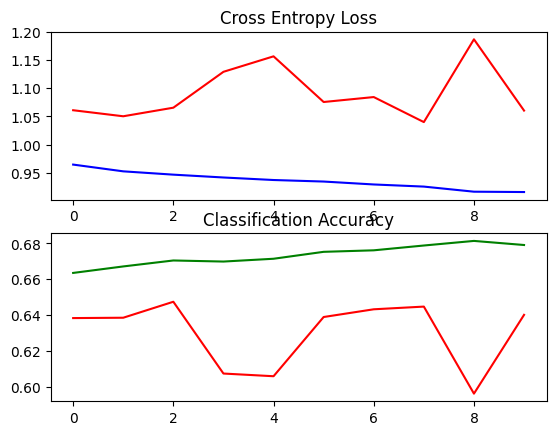

79/79 [==============================] - 11s 141ms/step - loss: 1.0604 - accuracy: 0.6402
Test Loss: 1.0604326725006104
Test Accuracy: 0.6402000188827515


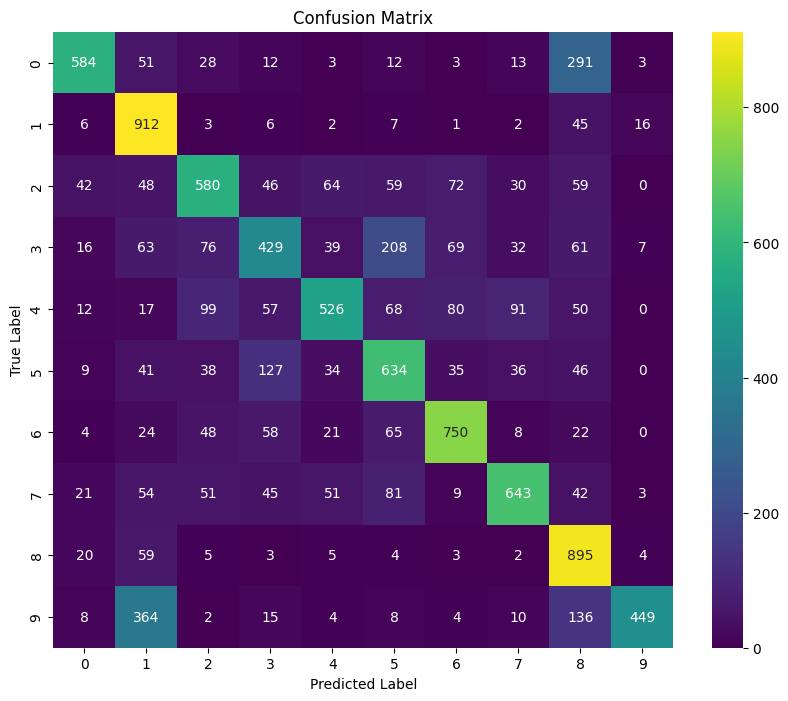

In [33]:
# Get the true labels and Make predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = model_vgg.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true_classes = np.argmax(y_true, axis=1)

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_vgg.evaluate(test_ds)
# Print the results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Evaluate the Model

def evaluate_model(model, history):
    
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='val')

    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='green', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='val')
    plt.show()

    # evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Model Loss:', test_loss)
    print('Model Accuracy:', test_acc)

    # make predictions
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    conf_mat = confusion_matrix(y_test_labels, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    
evaluate_model(model_vgg,history)

# TRANSFER LEARNING with VGG16
# Unfreeze the top few layers for fine-tuning
for layer in vgg_model.layers[-4:]:  # Fine-tune the last 4 layers
    layer.trainable = True

# Compile the model again with a lower learning rate
from tensorflow.keras.optimizers import Adam

model_vgg.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=.00001),  # Lower learning rate for fine-tuning
                  metrics=['accuracy'])

# Continue training (fine-tuning the top layers)
history_fine_tune = model_vgg.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

# Evaluate the fine-tuned model
score_fine_tune = model_vgg.evaluate(x_test, y_test)
print(f'Fine-tuned VGG16 Test Loss: {score_fine_tune[0]}, Test Accuracy: {score_fine_tune[1]}')



In [77]:
""" 
# Initialize the VGG16 model, pre-trained on ImageNet, without the top classification layer

vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Extract features for the training and test sets
train_features = vgg16_model.predict(x_train)
test_features = vgg16_model.predict(x_test)

# Reshape the extracted features
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Now the extracted features (train_features and test_features) can be used for further processing
print('Train features shape:', train_features.shape)
print('Test features shape:', test_features.shape) """


" \n# Initialize the VGG16 model, pre-trained on ImageNet, without the top classification layer\n\nvgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))\n\n# Extract features for the training and test sets\ntrain_features = vgg16_model.predict(x_train)\ntest_features = vgg16_model.predict(x_test)\n\n# Reshape the extracted features\ntrain_features = train_features.reshape(train_features.shape[0], -1)\ntest_features = test_features.reshape(test_features.shape[0], -1)\n\n# Now the extracted features (train_features and test_features) can be used for further processing\nprint('Train features shape:', train_features.shape)\nprint('Test features shape:', test_features.shape) "